# Data preparation

* From **business understanding**, we know the task to be solved.  
* Then we do **data understanding** to look into data.
* Now we are going to do some necessary or useful data transformation to reach the aim.

## Outline
0. Summary of data understanding
1. Missing and invalid data
2. Feature extraction
3. Making different statistical units
4. Data transformation

## Data and tasks
* Titanic2 (*titanic_train.csv*) - data preparation for an analysis of ticket fares
* Home Credit (*application_train.csv*) - segmentation of clients by family situation

In [1]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks", color_codes=True)

## Part I. Titanic and ticket fares
### Summary of data understanding
Just few facts from the exploration -- for the aim of this practice.

Let's consider these columns only: *pclass*, *sex*, *age*, *ticket*, *fare*, *cabin*, *embarked*

In [2]:
# data reading
df1 = pd.read_csv('titanic_train.csv')
df1 = df1[['passenger_id', 'ticket', 'pclass', 'fare', 'sex', 'age', 'cabin', 'embarked']]
df1

passenger_id              ticket  pclass     fare     sex   age cabin  \
0            1216              335432       3   7.7333  female   NaN   NaN   
1             699              315089       3   8.6625    male  38.0   NaN   
2            1267              345773       3  24.1500  female  30.0   NaN   
3             449               29105       2  23.0000  female  54.0   NaN   
4             576               28221       2  13.0000    male  40.0   NaN   
..            ...                 ...     ...      ...     ...   ...   ...   
845           158                 680       1  50.0000    male  55.0   C39   
846           174               11771       1  29.7000    male  58.0   B37   
847           467              244367       2  26.0000  female  24.0   NaN   
848          1112  SOTON/O.Q. 3101315       3  13.7750  female   3.0   NaN   
849           425              250647       2  13.0000    male  52.0   NaN   

    embarked  
0          Q  
1          S  
2          S  
3          S  
4          S  
..       ...  
845        S  
846        C  
847        S  
848        S  
849        S  

[850 rows x 8 columns]

In [3]:
# share of missing data (NaN, NULL) by columns
print(1 - df1.count()/len(df1))

passenger_id    0.000000
ticket          0.000000
pclass          0.000000
fare            0.001176
sex             0.000000
age             0.204706
cabin           0.775294
embarked        0.001176
dtype: float64


* *ticket*, *pclass* and *sex* are complete
* *fare* and *embarked* have negligible counts of missing data
* *age* and *cabin* have significant counts of missing data

In [4]:
# invalid values in data?
# frequency tables of categorical columns
print(df1['pclass'].value_counts())
print(df1['sex'].value_counts())
print(df1['embarked'].value_counts())
# the most often values in string columns
print(df1['ticket'].value_counts().sort_values(ascending=False)[:5])
print(df1['cabin'].value_counts().sort_values(ascending=False)[:5])

pclass
3    478
1    206
2    166
Name: count, dtype: int64
sex
male      551
female    299
Name: count, dtype: int64
embarked
S    589
C    176
Q     84
Name: count, dtype: int64
ticket
CA. 2343        10
1601             8
S.O.C. 14879     6
CA 2144          6
PC 17608         6
Name: count, dtype: int64
cabin
G6                 4
D                  4
B96 B98            4
C22 C26            4
B57 B59 B63 B66    4
Name: count, dtype: int64


> String columns (*ticket*, *cabin*) have expected frequencies -- no value has too high frequency.  
> Categorical columns seem to have valid values.

Let's look into numeric columns (*age*, *fare*).

Fare: minimum= 0.0 ; maximum= 512.3292 ; median= 14.1083


C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


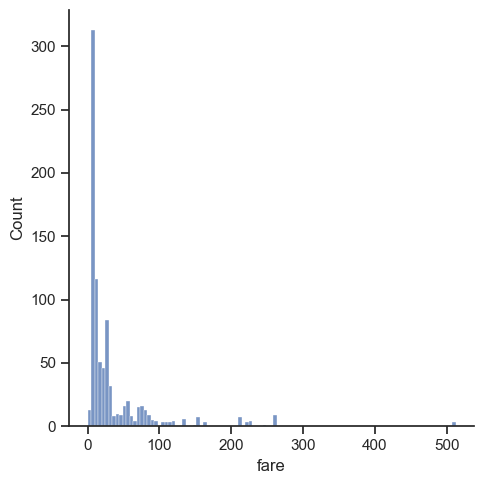

In [5]:
# distribution of values in numeric columns
sns.displot(df1['fare'])
print('Fare: minimum=', df1['fare'].min(), '; maximum=', df1['fare'].max(), '; median=', df1['fare'].median())

In [6]:
# zero fare is rather unexpected; how many passenger have zero fare?
print('Passengers with zero fare: ', (df1['fare']==0).sum())
print('The most often fares: ')
print(df1['fare'].value_counts().sort_values(ascending=False).iloc[0:5])

Passengers with zero fare:  11
The most often fares: 
fare
13.0000    42
8.0500     40
7.7500     39
7.8958     32
26.0000    29
Name: count, dtype: int64


> Fare values seem to be valid with exception of zero and missing values.

Age: minimum= 0.1667 ; maximum= 80.0 ; median= 28.0
The most often ages:
age
18.0    32
30.0    30
24.0    29
22.0    28
25.0    26
Name: count, dtype: int64


C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


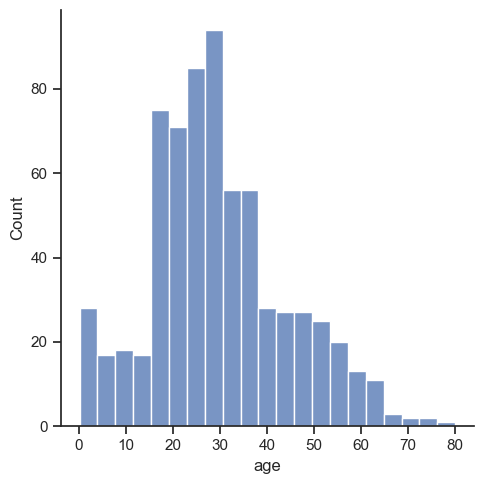

In [7]:
sns.displot(df1['age'])
print('Age: minimum=', df1['age'].min(), '; maximum=', df1['age'].max(), '; median=', df1['age'].median())
print('The most often ages:')
print(df1['age'].value_counts().sort_values(ascending=False).iloc[0:5])

> Age values seem to be fully valid with exception of missing values.

### Dealing with missing and invalid data

Now we use exploration outcomes for the data cleaning.

**TASK 1.**  
Consider how to treat missing or invalid data of fare, embarkment, age and cabin. Then prepare a script for data cleaning.

**Answers:**

* missing fare -- could be either omitted (one case only) or estimated from other attributes
* zero fare -- few cases only, could be kept as valid (possibly special passengers) or omitted (possibly errors)
* missing embarkment -- could be either be omitted (one case only) or estimated from other attributes
* missing age -- should not be omitted (too many cases, we have to deal with it other way)
* missing cabin -- should not be omitted (missing value is informative)

In [8]:
# cleaning - example of omitting records with missing values (keeping record with non-missing and valid values)
# we will not run it yet
# df1 = df1[df1['fare'].notna() & (df1['fare']>0) & (df1['embarked'].notna())]

### Feature extraction

Multiple persons travelled on one ticket, so they can have the same fare which was paid only once. It's a reason to make new statistical units &ndash; tickets. But is data for the same ticket consistent? Let's check the integrity of data for the tickets.

**TASK 2.**  
Explore whether all passengers with the same ticket have the same fare, pclass, embarkment and cabin.

In [9]:
# same fare for the same ticket?
print(df1.groupby('ticket').agg({'fare': 'nunique'}).value_counts())
# Which ticket is for a passenger with missing fare? Are there more passengers for this ticket?
ticket_na_fare = df1[df1['fare'].isna()]['ticket'].values.tolist()
df1[df1['ticket'].isin(ticket_na_fare)]

fare
1       659
0         1
Name: count, dtype: int64


passenger_id ticket  pclass  fare   sex   age cabin embarked
416          1225   3701       3   NaN  male  60.5   NaN        S

In [10]:
# same pclass for the same ticket?
print(df1.groupby('ticket').agg({'pclass': 'nunique'}).value_counts())

pclass
1         660
Name: count, dtype: int64


In [11]:
# same embarkments for the same ticket?
print(df1.groupby('ticket').agg({'embarked': 'nunique'}).value_counts())
# For which ticket were there more embarkments?
tmp_tickets = df1.groupby('ticket').agg({'embarked': 'nunique'})
ticket_mult_emb = tmp_tickets[tmp_tickets['embarked'] > 1].index.tolist()
df1[df1['ticket'].isin(ticket_mult_emb)]

embarked
1           658
0             1
2             1
Name: count, dtype: int64


passenger_id  ticket  pclass  fare     sex   age cabin embarked
285           258  113798       1  31.0  female  30.0   NaN        C
381            46  113798       1  31.0    male   NaN   NaN        S

In [12]:
# same cabin for the same ticket?
print(df1.groupby('ticket').agg({'cabin': 'nunique'}).value_counts())

cabin
0        532
1        112
2         14
3          1
4          1
Name: count, dtype: int64


> For each ticket, there is the same fare (possibly missing or zero) and same class.  
> For each ticket except two cases, there is one embarkment place. One ticket has two places and one ticket none (missing).  
> There can be various numbers of cabin for a ticket (and possibly none, too).

Now we make a table of tickets by few steps:

1. Base table -- unique rows of *ticket*, *pclass*, *fare* (we know there is integrity).
2. Aggregated features grouped by *ticket* -- e. g. count of passengers; join aggregated table to the base table.
3. Artificial aggregation as a solution of multiple embarkment -- we take the highest value of *embarked* to unify embarkment places for tickets.

**TASK 3.**  
Make a table with tickets as rows and features (some of them aggregated). Choose useful features for future analysis by yourself.

**Chosen features:**
* count of passengers
* ratio of male passengers
* age of the youngest and of the oldest passenger
* average age of passengers
* count af passengers with known age
* sex od the oldest passenger
* count of (distinct) cabins

In [13]:
# User function
def rate_males(s):
    return np.mean(np.where(s=='male', 1, 0))

### Base table
df2_base = df1[['ticket', 'pclass', 'fare']].drop_duplicates()
df2_base = df2_base.set_index('ticket') # setting 'ticket' column as key

### Multiple embarkment solution
df2_emb = df1.groupby('ticket').agg({'embarked': 'max'})
# print('Ticket with multiple embarkment has been unified:')
# print(df2_emb.loc['113798'])
# no need to set index - groupby + agg sets index by default

### Some chosen features
df2_feat = df1.groupby('ticket').agg({'ticket': 'count', 'sex': [rate_males],
                                      'age': ['min', 'max', np.mean, 'count'], 'cabin': 'nunique'})
# column names update
df2_feat.columns = ['pass_cnt', 'rate_males', 'age_min', 'age_max', 'age_mean', 'age_valid_cnt', 'cabin_cnt']

# sex of the oldest person for the ticket
df2_feat_sex_oldest = df1.sort_values(by=['ticket', 'age'], ascending=[True, False]) \
    .drop_duplicates('ticket')[['ticket', 'sex']]
df2_feat_sex_oldest = df2_feat_sex_oldest.set_index('ticket') # setting 'ticket' column as key
df2_feat_sex_oldest.columns = ['sex_oldest']

### Joining tables together
df2 = df2_base.join(df2_emb) # join is by default LEFT and index<->index
df2 = df2.join(df2_feat)
df2 = df2.join(df2_feat_sex_oldest)

df2

pclass     fare embarked  pass_cnt  rate_males  age_min  age_max  \
ticket                                                                      
335432        3   7.7333        Q         1         0.0      NaN      NaN   
315089        3   8.6625        S         1         1.0     38.0     38.0   
345773        3  24.1500        S         2         0.5     30.0     36.0   
29105         2  23.0000        S         2         0.0     20.0     54.0   
28221         2  13.0000        S         1         1.0     40.0     40.0   
...         ...      ...      ...       ...         ...      ...      ...   
3101267       3   6.4958        S         1         1.0     18.0     18.0   
19943         1  90.0000        S         1         1.0     38.0     38.0   
680           1  50.0000        S         1         1.0     55.0     55.0   
11771         1  29.7000        C         1         1.0     58.0     58.0   
250647        2  13.0000        S         1         1.0     52.0     52.0   

         age_mean  age_valid_cnt  cabin_cnt sex_oldest  
ticket                                                  
335432        NaN              0          0     female  
315089       38.0              1          0       male  
345773       33.0              2          0       male  
29105        37.0              2          0     female  
28221        40.0              1          0       male  
...           ...            ...        ...        ...  
3101267      18.0              1          0       male  
19943        38.0              1          1       male  
680          55.0              1          1       male  
11771        58.0              1          1       male  
250647       52.0              1          0       male  

[660 rows x 11 columns]

### Data transformation

* The distribution of fare is very skew. Let's transform it by log to get it better balanced.
* The fare is given as a total. But it's better to get an average fare per one passenger.

**TASK 4.**
Add new columns to the table as stated above.

In [14]:
# we use log10 for better interpretation, but simple log is ok, too
# be careful at zero fare - log is invalid! (we can use log(x+1) instead)
df2['fare_log'] = np.log10(df2['fare']+1)
df2['fare_per_pass'] = df2['fare'] / df2['pass_cnt']
df2

pclass     fare embarked  pass_cnt  rate_males  age_min  age_max  \
ticket                                                                      
335432        3   7.7333        Q         1         0.0      NaN      NaN   
315089        3   8.6625        S         1         1.0     38.0     38.0   
345773        3  24.1500        S         2         0.5     30.0     36.0   
29105         2  23.0000        S         2         0.0     20.0     54.0   
28221         2  13.0000        S         1         1.0     40.0     40.0   
...         ...      ...      ...       ...         ...      ...      ...   
3101267       3   6.4958        S         1         1.0     18.0     18.0   
19943         1  90.0000        S         1         1.0     38.0     38.0   
680           1  50.0000        S         1         1.0     55.0     55.0   
11771         1  29.7000        C         1         1.0     58.0     58.0   
250647        2  13.0000        S         1         1.0     52.0     52.0   

         age_mean  age_valid_cnt  cabin_cnt sex_oldest  fare_log  \
ticket                                                             
335432        NaN              0          0     female  0.941178   
315089       38.0              1          0       male  0.985090   
345773       33.0              2          0       male  1.400538   
29105        37.0              2          0     female  1.380211   
28221        40.0              1          0       male  1.146128   
...           ...            ...        ...        ...       ...   
3101267      18.0              1          0       male  0.874818   
19943        38.0              1          1       male  1.959041   
680          55.0              1          1       male  1.707570   
11771        58.0              1          1       male  1.487138   
250647       52.0              1          0       male  1.146128   

         fare_per_pass  
ticket                  
335432          7.7333  
315089          8.6625  
345773         12.0750  
29105          11.5000  
28221          13.0000  
...                ...  
3101267         6.4958  
19943          90.0000  
680            50.0000  
11771          29.7000  
250647         13.0000  

[660 rows x 13 columns]

**TASK 5.**
1. Make new columns as meaningful categories "binned" from count of passengers, mean age, count of distinct cabins.
2. Make flags "child" and "baby": flag is True when the youngest passenger for a ticket was under 15, resp. under 3 years.
3. Find the most often combinations of men and women travelling on one ticket (e. g. "single man", "man+woman", "two men", "other" etc.) and make a new column with category description.

pass_cnt
1     542
2      83
3      19
4       7
6       4
5       3
10      1
8       1
Name: count, dtype: int64
pass_cnt_cat
1     542
2      83
3      19
4+     16
Name: count, dtype: int64
age_mean_cat
15-       36
15-20     75
20-25    108
25-30     91
30-40    108
40+      101
Name: count, dtype: int64
cabin_cnt
0    532
1    112
2     14
4      1
3      1
Name: count, dtype: int64
cabin_cnt_cat
none    532
1       112
2+       16
Name: count, dtype: int64


C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


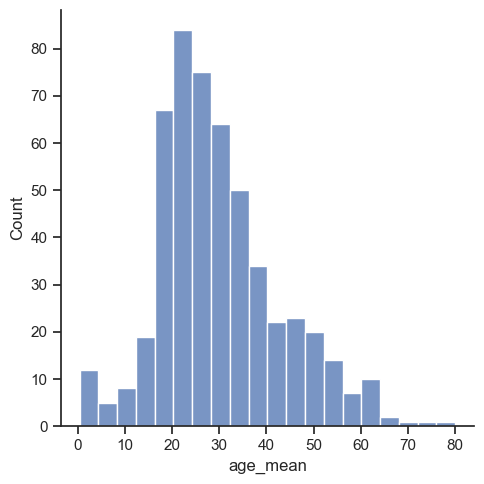

In [15]:
# First, find proper breaks for binning; then make binning; then check frequencies

### pass_cnt
print(df2['pass_cnt'].value_counts())
# categories will be 1, 2, 3, 4+
df2['pass_cnt_cat'] = pd.cut(df2['pass_cnt'], [0, 1, 2, 3, 1000], labels=['1', '2', '3', '4+'])
print(df2['pass_cnt_cat'].value_counts())

### age_mean
sns.displot(df2['age_mean'])
# categories will be up to 15, 15-25, 25-40, 40+
df2['age_mean_cat'] = pd.cut(df2['age_mean'], [0, 15, 20, 25, 30, 40, 1000],
                             labels=['15-', '15-20', '20-25', '25-30', '30-40', '40+'])
print(df2['age_mean_cat'].value_counts().sort_index())

### cabin_cnt (same approach as pass_cnt)
print(df2['cabin_cnt'].value_counts())
# categories will be none, 1, 2+
df2['cabin_cnt_cat'] = pd.cut(df2['cabin_cnt'], [0, 1, 2, 1000], right=False, labels=['none', '1', '2+'])
print(df2['cabin_cnt_cat'].value_counts())

In [16]:
# Flags child and baby
df2['flag_child'] = (df2['age_min'] < 15)
df2['flag_baby'] = (df2['age_min'] < 3)

In [17]:
# Analyze frequencies of various combinations
pd.pivot_table(df2, values='fare', index=['pass_cnt_cat'], columns=['rate_males'], aggfunc=np.size)

# then make a new column
# very simple example - can be extended by nested np.where conditions
df2['group'] = np.where((df2['rate_males']==1) & (df2['pass_cnt']==1), 'Single man', 'Other')

df2

pclass     fare embarked  pass_cnt  rate_males  age_min  age_max  \
ticket                                                                      
335432        3   7.7333        Q         1         0.0      NaN      NaN   
315089        3   8.6625        S         1         1.0     38.0     38.0   
345773        3  24.1500        S         2         0.5     30.0     36.0   
29105         2  23.0000        S         2         0.0     20.0     54.0   
28221         2  13.0000        S         1         1.0     40.0     40.0   
...         ...      ...      ...       ...         ...      ...      ...   
3101267       3   6.4958        S         1         1.0     18.0     18.0   
19943         1  90.0000        S         1         1.0     38.0     38.0   
680           1  50.0000        S         1         1.0     55.0     55.0   
11771         1  29.7000        C         1         1.0     58.0     58.0   
250647        2  13.0000        S         1         1.0     52.0     52.0   

         age_mean  age_valid_cnt  cabin_cnt sex_oldest  fare_log  \
ticket                                                             
335432        NaN              0          0     female  0.941178   
315089       38.0              1          0       male  0.985090   
345773       33.0              2          0       male  1.400538   
29105        37.0              2          0     female  1.380211   
28221        40.0              1          0       male  1.146128   
...           ...            ...        ...        ...       ...   
3101267      18.0              1          0       male  0.874818   
19943        38.0              1          1       male  1.959041   
680          55.0              1          1       male  1.707570   
11771        58.0              1          1       male  1.487138   
250647       52.0              1          0       male  1.146128   

         fare_per_pass pass_cnt_cat age_mean_cat cabin_cnt_cat  flag_child  \
ticket                                                                       
335432          7.7333            1          NaN          none       False   
315089          8.6625            1        30-40          none       False   
345773         12.0750            2        30-40          none       False   
29105          11.5000            2        30-40          none       False   
28221          13.0000            1        30-40          none       False   
...                ...          ...          ...           ...         ...   
3101267         6.4958            1        15-20          none       False   
19943          90.0000            1        30-40             1       False   
680            50.0000            1          40+             1       False   
11771          29.7000            1          40+             1       False   
250647         13.0000            1          40+          none       False   

         flag_baby       group  
ticket                          
335432       False       Other  
315089       False  Single man  
345773       False       Other  
29105        False       Other  
28221        False  Single man  
...            ...         ...  
3101267      False  Single man  
19943        False  Single man  
680          False  Single man  
11771        False  Single man  
250647       False  Single man  

[660 rows x 19 columns]

## Part II. Home credit
The dataset `application_train.csv` contains Home Credit clients who got a loan. Each client (=row in the dataset) has plenty of data in columns. We are interested in the segmentation of client portfolio. Segmentation is a division the basic dataset into some well-defined segment, like "young single men", "old widow women living alone" etc.

The relevant columns are *days_birth*, *code_gender*, *cnt_children*, *cnt_fam_members*, *name_family_status*.

**TASK: look into data and try to find some big segments based on some features from the set of relevant columns. You may need to do some binning before.**

In [18]:
df_hc = pd.read_csv('application_train.csv')
df_hc.columns = df_hc.columns.str.lower()
df_hc = df_hc[['days_birth', 'code_gender', 'cnt_children', 'cnt_fam_members', 'name_family_status']]
df_hc

days_birth code_gender  cnt_children  cnt_fam_members  \
0            -9461           M             0              1.0   
1           -16765           F             0              2.0   
2           -19046           M             0              1.0   
3           -19005           F             0              2.0   
4           -19932           M             0              1.0   
...            ...         ...           ...              ...   
307506       -9327           M             0              1.0   
307507      -20775           F             0              1.0   
307508      -14966           F             0              1.0   
307509      -11961           F             0              2.0   
307510      -16856           F             0              2.0   

          name_family_status  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307506             Separated  
307507                 Widow  
307508             Separated  
307509               Married  
307510               Married  

[307511 rows x 5 columns]